In [23]:
# ============================================================================
# 셀 1: 라이브러리 임포트
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# 경고 메시지 숨기기
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (macOS)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ 라이브러리 임포트 완료!")

✅ 라이브러리 임포트 완료!


In [24]:
# ============================================================================
# 셀 2: 데이터 로딩 - 시트 정보 확인
# ============================================================================

# 데이터 파일 경로
data_path = "../data/raw/E Commerce Dataset.xlsx"

# Excel 파일의 시트 정보 확인
excel_file = pd.ExcelFile(data_path)
print(f"📁 파일: {data_path}")
print(f"📋 시트 목록: {excel_file.sheet_names}")
print()

# 각 시트의 기본 정보 확인
for sheet_name in excel_file.sheet_names:
    print(f"🔍 시트 '{sheet_name}' 정보:")
    df_temp = pd.read_excel(data_path, sheet_name=sheet_name, nrows=5)
    print(f"  - 크기: {df_temp.shape}")
    print(f"  - 컬럼: {list(df_temp.columns)}")
    print()

📁 파일: ../data/raw/E Commerce Dataset.xlsx
📋 시트 목록: ['Data Dict', 'E Comm']

🔍 시트 'Data Dict' 정보:
  - 크기: (5, 4)
  - 컬럼: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']

🔍 시트 'E Comm' 정보:
  - 크기: (5, 20)
  - 컬럼: ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']



In [25]:
# ============================================================================
# 셀 3: 데이터 로딩 - 실제 데이터
# ============================================================================

# 'E Comm' 시트를 로드 (실제 데이터)
df = pd.read_excel(data_path, sheet_name='E Comm')
print(f"✅ 데이터 로드 성공!")
print(f"📊 데이터 크기: {df.shape[0]:,} 행 × {df.shape[1]} 열")
print(f"💾 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ 데이터 로드 성공!
📊 데이터 크기: 5,630 행 × 20 열
💾 메모리 사용량: 2.18 MB


In [26]:
# ============================================================================
# 셀 4: 데이터 미리보기
# ============================================================================

# 데이터 미리보기
print("📋 데이터 미리보기 (처음 5행):")
print(df.head())

print("\n📋 데이터 미리보기 (마지막 5행):")
print(df.tail())

📋 데이터 미리보기 (처음 5행):
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore M

In [27]:
# ============================================================================
# 셀 5: 컬럼 정보
# ============================================================================

# 컬럼 정보
print("🔍 컬럼 정보:")
print(f"총 {len(df.columns)}개 컬럼")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n📋 데이터 타입:")
print(df.dtypes)

🔍 컬럼 정보:
총 20개 컬럼
 1. CustomerID
 2. Churn
 3. Tenure
 4. PreferredLoginDevice
 5. CityTier
 6. WarehouseToHome
 7. PreferredPaymentMode
 8. Gender
 9. HourSpendOnApp
10. NumberOfDeviceRegistered
11. PreferedOrderCat
12. SatisfactionScore
13. MaritalStatus
14. NumberOfAddress
15. Complain
16. OrderAmountHikeFromlastYear
17. CouponUsed
18. OrderCount
19. DaySinceLastOrder
20. CashbackAmount

📋 데이터 타입:
CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmount

In [28]:
# ============================================================================
# 셀 6: 결측값 분석
# ============================================================================

# 결측값 정보
missing_info = df.isnull().sum()
missing_percent = (missing_info / len(df)) * 100
missing_df = pd.DataFrame({
    '결측값 개수': missing_info,
    '결측값 비율(%)': missing_percent
})

print("🔍 결측값 분석:")
print(f"전체 결측값 개수: {missing_info.sum():,}개")
print(f"결측값이 있는 컬럼 수: {(missing_info > 0).sum()}개")
print()

if missing_info.sum() > 0:
    print("📊 결측값이 있는 컬럼:")
    print(missing_df[missing_df['결측값 개수'] > 0].sort_values('결측값 개수', ascending=False))
else:
    print("✅ 결측값이 없습니다!")

🔍 결측값 분석:
전체 결측값 개수: 1,856개
결측값이 있는 컬럼 수: 7개

📊 결측값이 있는 컬럼:
                             결측값 개수  결측값 비율(%)
DaySinceLastOrder               307   5.452931
OrderAmountHikeFromlastYear     265   4.706927
Tenure                          264   4.689165
OrderCount                      258   4.582593
CouponUsed                      256   4.547069
HourSpendOnApp                  255   4.529307
WarehouseToHome                 251   4.458259


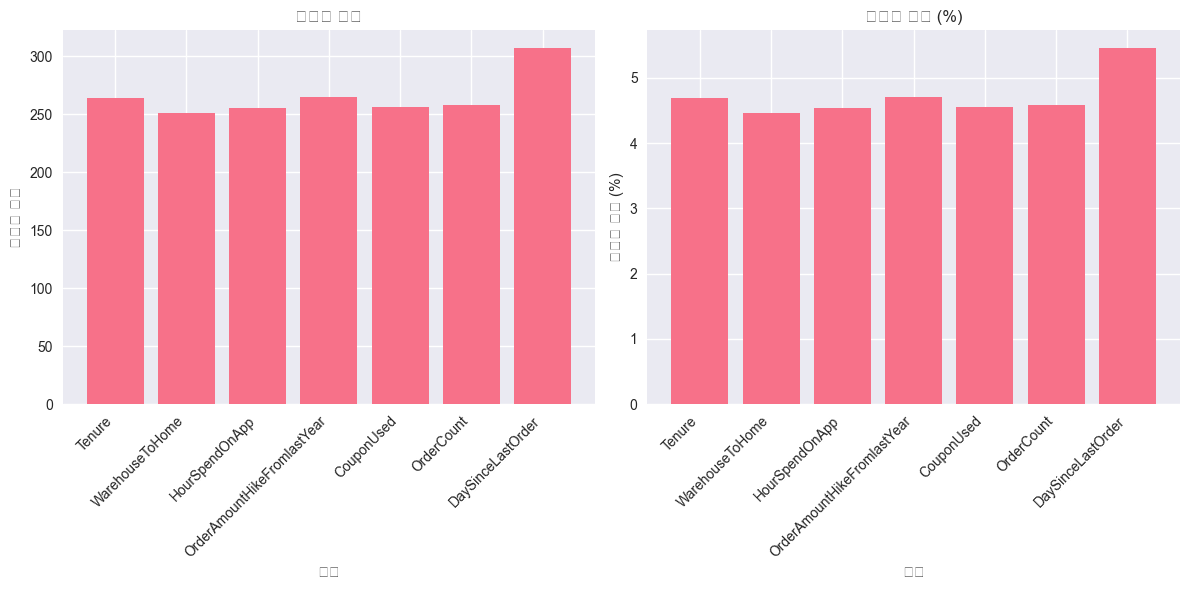

In [29]:
# ============================================================================
# 셀 7: 결측값 시각화
# ============================================================================

# 결측값 시각화
plt.figure(figsize=(12, 6))

# 결측값이 있는 컬럼만 필터링
missing_cols = missing_df[missing_df['결측값 개수'] > 0]

if len(missing_cols) > 0:
    plt.subplot(1, 2, 1)
    plt.bar(range(len(missing_cols)), missing_cols['결측값 개수'])
    plt.title('결측값 개수')
    plt.xlabel('컬럼')
    plt.ylabel('결측값 개수')
    plt.xticks(range(len(missing_cols)), missing_cols.index, rotation=45, ha='right')
    
    plt.subplot(1, 2, 2)
    plt.bar(range(len(missing_cols)), missing_cols['결측값 비율(%)'])
    plt.title('결측값 비율 (%)')
    plt.xlabel('컬럼')
    plt.ylabel('결측값 비율 (%)')
    plt.xticks(range(len(missing_cols)), missing_cols.index, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
else:
    plt.text(0.5, 0.5, '결측값 없음', ha='center', va='center', 
             transform=plt.gca().transAxes, fontsize=14)
    plt.title('결측값 현황')
    plt.show()

In [30]:
# ============================================================================
# 셀 8: 데이터 타입 및 컬럼 분석
# ============================================================================

# 수치형 vs 범주형 컬럼 분류
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("📊 데이터 타입별 컬럼 분류:")
print(f"수치형 컬럼 ({len(numeric_cols)}개): {numeric_cols}")
print(f"범주형 컬럼 ({len(categorical_cols)}개): {categorical_cols}")

# 범주형 컬럼의 unique 값 개수
print("\n🏷️ 범주형 컬럼 unique 값 개수:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count}개")

📊 데이터 타입별 컬럼 분류:
수치형 컬럼 (15개): ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
범주형 컬럼 (5개): ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

🏷️ 범주형 컬럼 unique 값 개수:
  PreferredLoginDevice: 3개
  PreferredPaymentMode: 7개
  Gender: 2개
  PreferedOrderCat: 6개
  MaritalStatus: 3개


In [31]:
# ============================================================================
# 셀 9: 기본 통계 정보 - 수치형 컬럼
# ============================================================================

# 수치형 컬럼의 기술통계
print("📈 수치형 컬럼 기술통계:")
print(df[numeric_cols].describe())

📈 수치형 컬럼 기술통계:
         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380

In [32]:
# ============================================================================
# 셀 10: 기본 통계 정보 - 범주형 컬럼
# ============================================================================

# 범주형 컬럼의 기본 정보
print("🏷️ 범주형 컬럼 기본 정보:")
for col in categorical_cols:
    print(f"\n📌 {col}:")
    value_counts = df[col].value_counts()
    print(f"  - 최빈값: {value_counts.index[0]} ({value_counts.iloc[0]}개, {(value_counts.iloc[0]/len(df)*100):.1f}%)")
    print(f"  - 최소빈값: {value_counts.index[-1]} ({value_counts.iloc[-1]}개, {(value_counts.iloc[-1]/len(df)*100):.1f}%)")
    
    # 상위 5개 값 표시
    print(f"  - 상위 5개 값:")
    for i, (value, count) in enumerate(value_counts.head().items(), 1):
        percentage = (count / len(df)) * 100
        print(f"    {i}. {value}: {count}개 ({percentage:.1f}%)")

🏷️ 범주형 컬럼 기본 정보:

📌 PreferredLoginDevice:
  - 최빈값: Mobile Phone (2765개, 49.1%)
  - 최소빈값: Phone (1231개, 21.9%)
  - 상위 5개 값:
    1. Mobile Phone: 2765개 (49.1%)
    2. Computer: 1634개 (29.0%)
    3. Phone: 1231개 (21.9%)

📌 PreferredPaymentMode:
  - 최빈값: Debit Card (2314개, 41.1%)
  - 최소빈값: Cash on Delivery (149개, 2.6%)
  - 상위 5개 값:
    1. Debit Card: 2314개 (41.1%)
    2. Credit Card: 1501개 (26.7%)
    3. E wallet: 614개 (10.9%)
    4. UPI: 414개 (7.4%)
    5. COD: 365개 (6.5%)

📌 Gender:
  - 최빈값: Male (3384개, 60.1%)
  - 최소빈값: Female (2246개, 39.9%)
  - 상위 5개 값:
    1. Male: 3384개 (60.1%)
    2. Female: 2246개 (39.9%)

📌 PreferedOrderCat:
  - 최빈값: Laptop & Accessory (2050개, 36.4%)
  - 최소빈값: Others (264개, 4.7%)
  - 상위 5개 값:
    1. Laptop & Accessory: 2050개 (36.4%)
    2. Mobile Phone: 1271개 (22.6%)
    3. Fashion: 826개 (14.7%)
    4. Mobile: 809개 (14.4%)
    5. Grocery: 410개 (7.3%)

📌 MaritalStatus:
  - 최빈값: Married (2986개, 53.0%)
  - 최소빈값: Divorced (848개, 15.1%)
  - 상위 5개 값:
    1. Married: 2986

In [33]:
# ============================================================================
# 셀 11: 타겟 변수(Churn) 분석
# ============================================================================

# Churn 분포 분석
churn_counts = df['Churn'].value_counts()
churn_percentages = (churn_counts / len(df)) * 100

print("🎯 타겟 변수(Churn) 분석:")
print(f"전체 고객 수: {len(df):,}명")
print(f"이탈 고객 수: {churn_counts[1]:,}명 ({churn_percentages[1]:.1f}%)")
print(f"유지 고객 수: {churn_counts[0]:,}명 ({churn_percentages[0]:.1f}%)")
print(f"이탈률: {churn_percentages[1]:.1f}%")

🎯 타겟 변수(Churn) 분석:
전체 고객 수: 5,630명
이탈 고객 수: 948명 (16.8%)
유지 고객 수: 4,682명 (83.2%)
이탈률: 16.8%


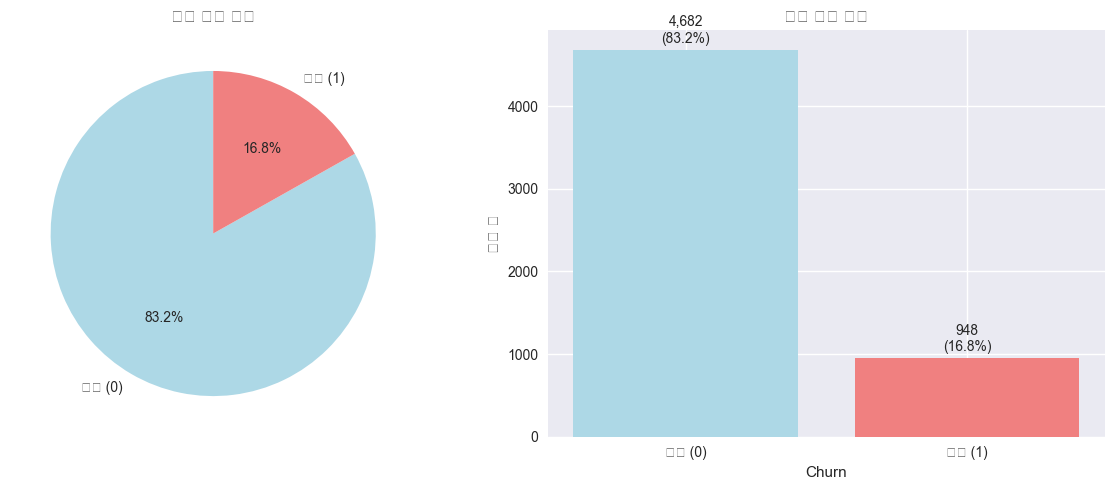

In [34]:
# ============================================================================
# 셀 12: Churn 분포 시각화
# ============================================================================

# Churn 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 파이 차트
axes[0].pie(churn_counts.values, labels=['유지 (0)', '이탈 (1)'], 
           autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[0].set_title('고객 이탈 분포')

# 막대 차트
bars = axes[1].bar(churn_counts.index, churn_counts.values, 
                   color=['lightblue', 'lightcoral'])
axes[1].set_title('고객 이탈 분포')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('고객 수')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['유지 (0)', '이탈 (1)'])

# 값 표시
for bar, count, percentage in zip(bars, churn_counts.values, churn_percentages):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{count:,}\n({percentage:.1f}%)',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

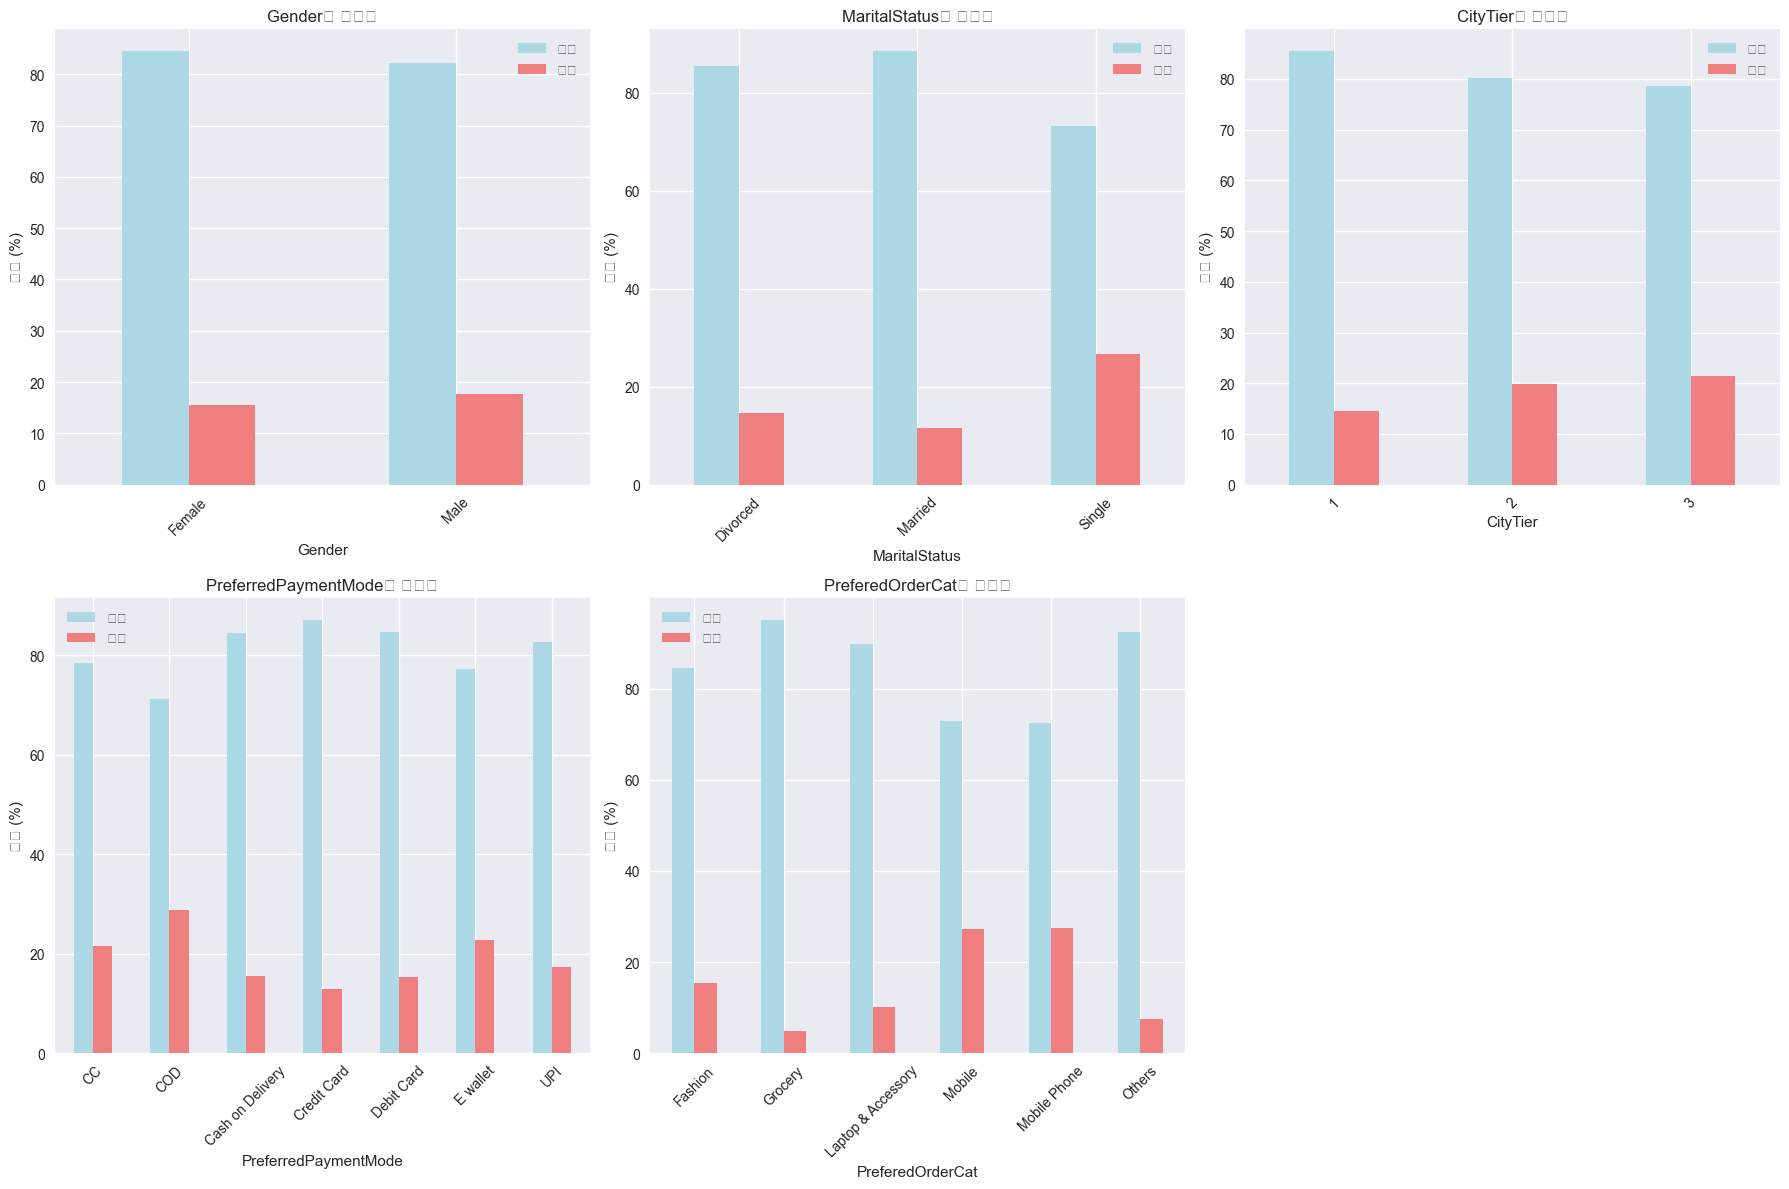

In [35]:
# ============================================================================
# 셀 13: 범주형 변수 분석 - 시각화
# ============================================================================

# 주요 범주형 변수들의 Churn과의 관계 분석
categorical_features = ['Gender', 'MaritalStatus', 'CityTier', 'PreferredPaymentMode', 'PreferedOrderCat']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        # Churn과의 교차표 생성
        crosstab = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
        
        # 막대 차트
        crosstab.plot(kind='bar', ax=axes[i], color=['lightblue', 'lightcoral'])
        axes[i].set_title(f'{feature}별 이탈률')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('비율 (%)')
        axes[i].legend(['유지', '이탈'])
        axes[i].tick_params(axis='x', rotation=45)

# 마지막 subplot 제거 (5개 변수만 있으므로)
if len(categorical_features) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

In [36]:
# ============================================================================
# 셀 14: 범주형 변수 분석 - 상세 통계
# ============================================================================

# 범주형 변수별 상세 분석
print("🔍 범주형 변수별 이탈률 상세 분석:")
print("=" * 60)

for feature in categorical_features:
    print(f"\n📌 {feature}별 이탈률:")
    churn_by_feature = df.groupby(feature)['Churn'].agg(['count', 'sum', 'mean'])
    
    for category in churn_by_feature.index:
        count = churn_by_feature.loc[category, 'count']
        churn_count = churn_by_feature.loc[category, 'sum']
        churn_rate = churn_by_feature.loc[category, 'mean'] * 100
        print(f"  {category}: {churn_rate:.1f}% ({churn_count}/{count}명)")

🔍 범주형 변수별 이탈률 상세 분석:

📌 Gender별 이탈률:
  Female: 15.5% (348/2246명)
  Male: 17.7% (600/3384명)

📌 MaritalStatus별 이탈률:
  Divorced: 14.6% (124/848명)
  Married: 11.5% (344/2986명)
  Single: 26.7% (480/1796명)

📌 CityTier별 이탈률:
  1: 14.5% (532/3666명)
  2: 19.8% (48/242명)
  3: 21.4% (368/1722명)

📌 PreferredPaymentMode별 이탈률:
  CC: 21.6% (59/273명)
  COD: 28.8% (105/365명)
  Cash on Delivery: 15.4% (23/149명)
  Credit Card: 12.9% (193/1501명)
  Debit Card: 15.4% (356/2314명)
  E wallet: 22.8% (140/614명)
  UPI: 17.4% (72/414명)

📌 PreferedOrderCat별 이탈률:
  Fashion: 15.5% (128/826명)
  Grocery: 4.9% (20/410명)
  Laptop & Accessory: 10.2% (210/2050명)
  Mobile: 27.2% (220/809명)
  Mobile Phone: 27.5% (350/1271명)
  Others: 7.6% (20/264명)


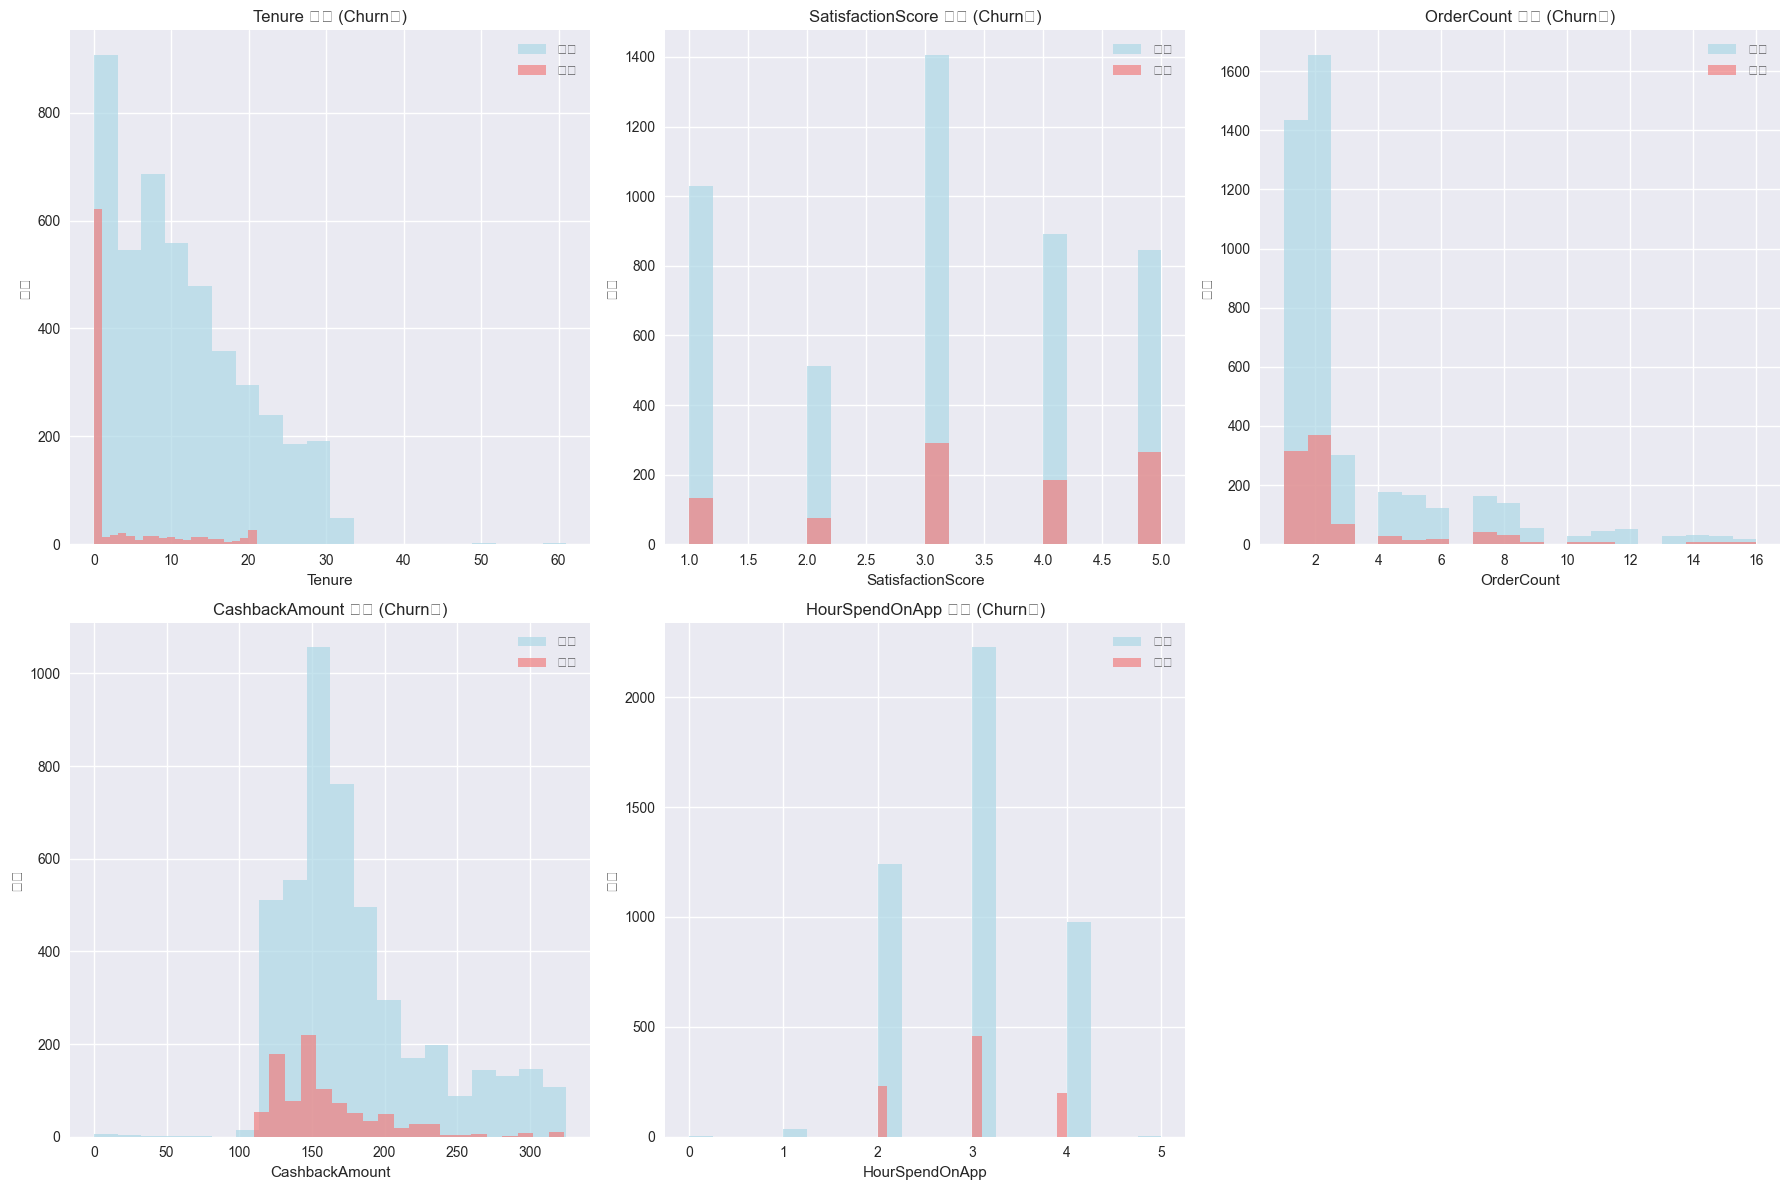

In [37]:
# ============================================================================
# 셀 15: 수치형 변수 분석 - 히스토그램
# ============================================================================

# 주요 수치형 변수들의 분포
important_numeric = ['Tenure', 'SatisfactionScore', 'OrderCount', 'CashbackAmount', 'HourSpendOnApp']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(important_numeric):
    if i < len(axes):
        # Churn별로 분리하여 히스토그램
        axes[i].hist(df[df['Churn']==0][feature].dropna(), alpha=0.7, 
                    label='유지', bins=20, color='lightblue')
        axes[i].hist(df[df['Churn']==1][feature].dropna(), alpha=0.7, 
                    label='이탈', bins=20, color='lightcoral')
        axes[i].set_title(f'{feature} 분포 (Churn별)')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('빈도')
        axes[i].legend()

# 마지막 subplot 제거 (5개 변수만 있으므로)
if len(important_numeric) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

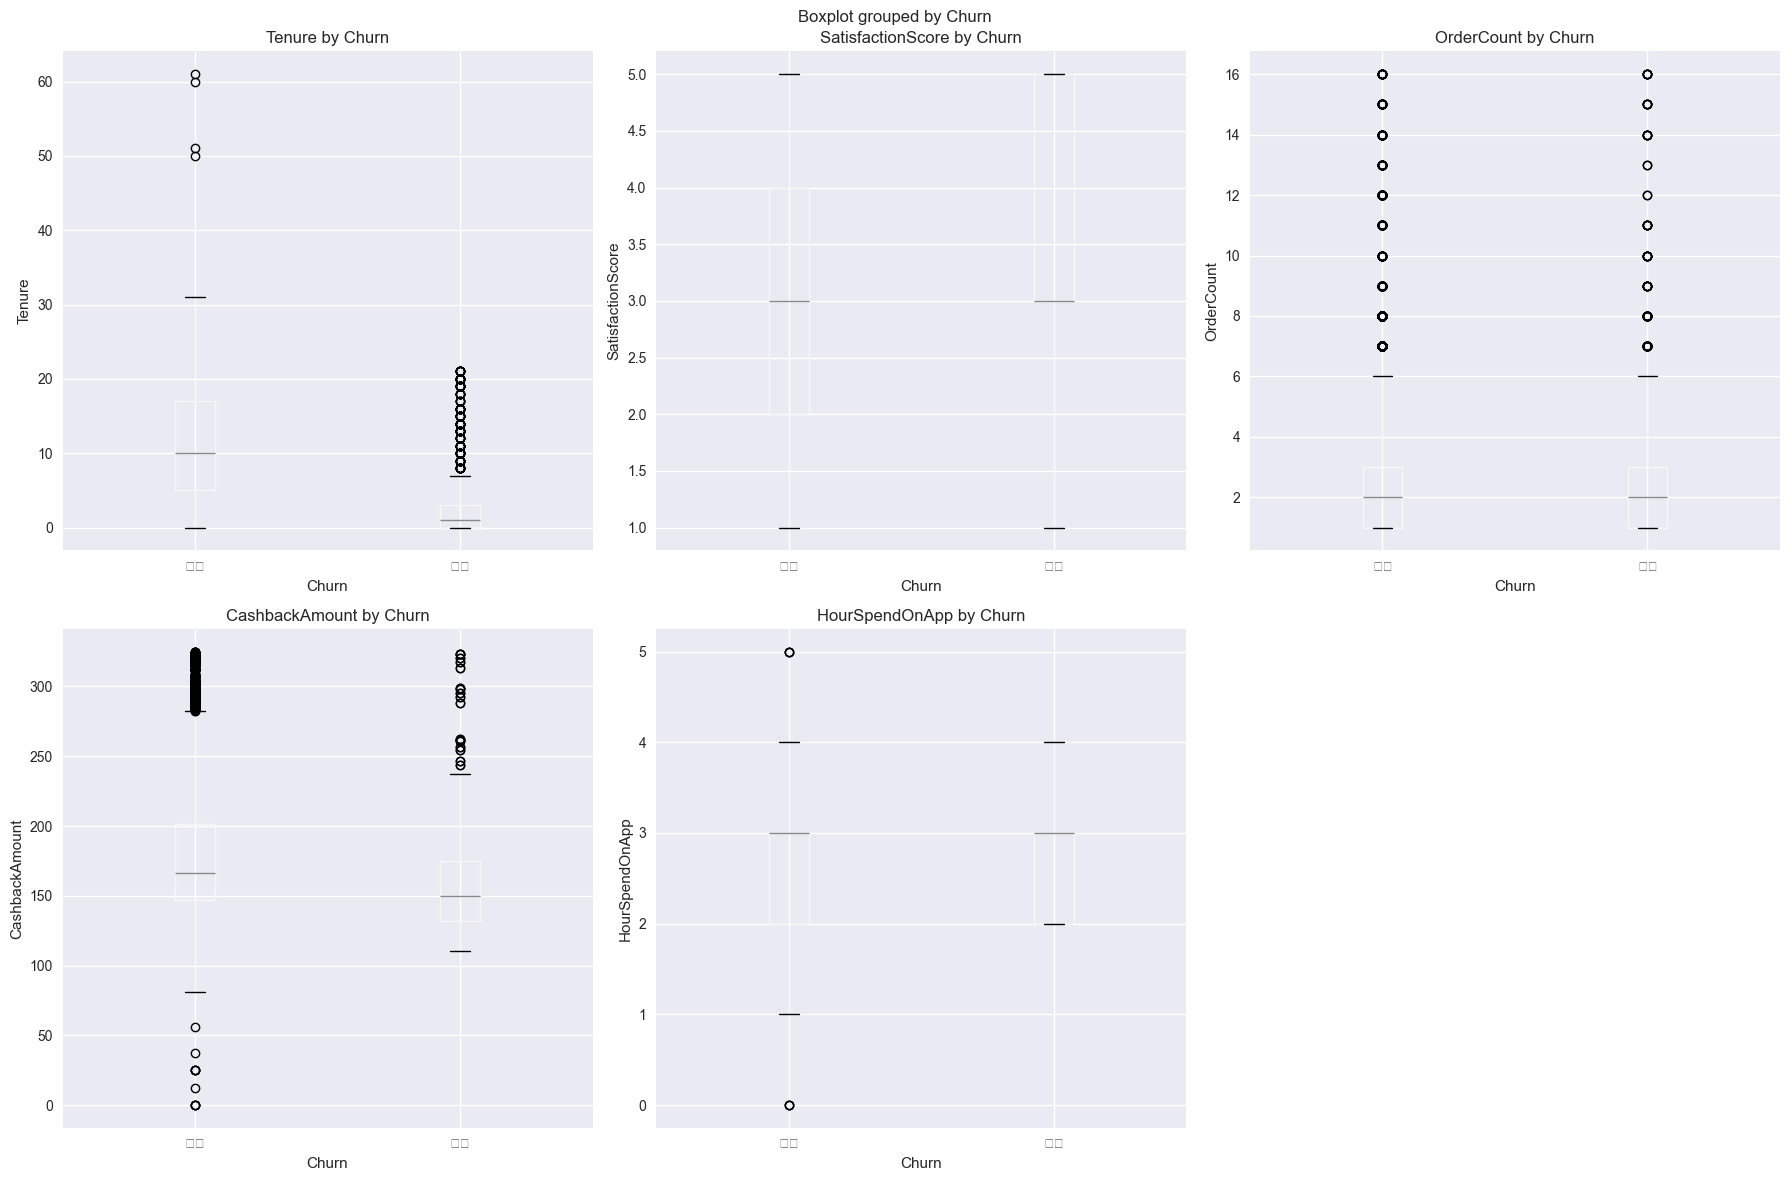

In [38]:
# ============================================================================
# 셀 16: 수치형 변수 분석 - 박스플롯
# ============================================================================

# 수치형 변수별 Churn과의 관계 (박스플롯)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(important_numeric):
    if i < len(axes):
        # 박스플롯
        df.boxplot(column=feature, by='Churn', ax=axes[i])
        axes[i].set_title(f'{feature} by Churn')
        axes[i].set_xlabel('Churn')
        axes[i].set_ylabel(feature)
        axes[i].set_xticklabels(['유지', '이탈'])

# 마지막 subplot 제거
if len(important_numeric) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

In [39]:
# ============================================================================
# 셀 17: 수치형 변수 분석 - 통계 요약
# ============================================================================

# 수치형 변수별 통계 요약 (Churn별)
print("📊 수치형 변수별 통계 요약 (Churn별):")
print("=" * 60)

for feature in important_numeric:
    print(f"\n📌 {feature}:")
    
    # 유지 고객 통계
    loyal_stats = df[df['Churn']==0][feature].describe()
    print(f"  유지 고객 (Churn=0):")
    print(f"    - 평균: {loyal_stats['mean']:.2f}")
    print(f"    - 중앙값: {loyal_stats['50%']:.2f}")
    print(f"    - 표준편차: {loyal_stats['std']:.2f}")
    
    # 이탈 고객 통계
    churn_stats = df[df['Churn']==1][feature].describe()
    print(f"  이탈 고객 (Churn=1):")
    print(f"    - 평균: {churn_stats['mean']:.2f}")
    print(f"    - 중앙값: {churn_stats['50%']:.2f}")
    print(f"    - 표준편차: {churn_stats['std']:.2f}")

📊 수치형 변수별 통계 요약 (Churn별):

📌 Tenure:
  유지 고객 (Churn=0):
    - 평균: 11.50
    - 중앙값: 10.00
    - 표준편차: 8.42
  이탈 고객 (Churn=1):
    - 평균: 3.38
    - 중앙값: 1.00
    - 표준편차: 5.49

📌 SatisfactionScore:
  유지 고객 (Churn=0):
    - 평균: 3.00
    - 중앙값: 3.00
    - 표준편차: 1.38
  이탈 고객 (Churn=1):
    - 평균: 3.39
    - 중앙값: 3.00
    - 표준편차: 1.34

📌 OrderCount:
  유지 고객 (Churn=0):
    - 평균: 3.05
    - 중앙값: 2.00
    - 표준편차: 2.96
  이탈 고객 (Churn=1):
    - 평균: 2.82
    - 중앙값: 2.00
    - 표준편차: 2.81

📌 CashbackAmount:
  유지 고객 (Churn=0):
    - 평균: 180.64
    - 중앙값: 166.12
    - 표준편차: 50.43
  이탈 고객 (Churn=1):
    - 평균: 160.37
    - 중앙값: 149.66
    - 표준편차: 38.44

📌 HourSpendOnApp:
  유지 고객 (Churn=0):
    - 평균: 2.93
    - 중앙값: 3.00
    - 표준편차: 0.73
  이탈 고객 (Churn=1):
    - 평균: 2.96
    - 중앙값: 3.00
    - 표준편차: 0.69


In [40]:
# ============================================================================
# 셀 18: 초기 인사이트
# ============================================================================

# 주요 인사이트 요약
print("💡 초기 데이터 분석 인사이트")
print("=" * 50)

print("\n📊 데이터 개요:")
print(f"- 총 고객 수: {len(df):,}명")
print(f"- 전체 이탈률: {df['Churn'].mean()*100:.1f}%")
print(f"- 데이터 품질: 결측값 {(df.isnull().sum().sum()/len(df)/len(df.columns)*100):.1f}%")

print("\n🎯 주요 발견사항:")

# 1. 이탈률이 높은 그룹
print("1. 이탈률이 높은 고객 그룹:")
single_churn = df[df['MaritalStatus']=='Single']['Churn'].mean()*100
tier3_churn = df[df['CityTier']==3]['Churn'].mean()*100
print(f"   - Single: {single_churn:.1f}%")
print(f"   - Tier 3 도시: {tier3_churn:.1f}%")

# 2. 만족도와 이탈의 관계
print("\n2. 만족도와 이탈의 관계:")
low_satisfaction_churn = df[df['SatisfactionScore']<=2]['Churn'].mean()*100
high_satisfaction_churn = df[df['SatisfactionScore']>=4]['Churn'].mean()*100
print(f"   - 낮은 만족도(1-2점): {low_satisfaction_churn:.1f}%")
print(f"   - 높은 만족도(4-5점): {high_satisfaction_churn:.1f}%")

# 3. 주문 횟수와 이탈의 관계
print("\n3. 주문 횟수와 이탈의 관계:")
low_order_churn = df[df['OrderCount']<=1]['Churn'].mean()*100
high_order_churn = df[df['OrderCount']>=5]['Churn'].mean()*100
print(f"   - 낮은 주문 횟수(≤1회): {low_order_churn:.1f}%")
print(f"   - 높은 주문 횟수(≥5회): {high_order_churn:.1f}%")

print("\n🚀 다음 단계 제안:")
print("1. 상세한 피쳐 엔지니어링 수행")
print("2. 상관관계 분석 및 히트맵 생성")
print("3. 모델링을 위한 데이터 전처리")
print("4. 다양한 머신러닝 모델 실험")

💡 초기 데이터 분석 인사이트

📊 데이터 개요:
- 총 고객 수: 5,630명
- 전체 이탈률: 16.8%
- 데이터 품질: 결측값 1.6%

🎯 주요 발견사항:
1. 이탈률이 높은 고객 그룹:
   - Single: 26.7%
   - Tier 3 도시: 21.4%

2. 만족도와 이탈의 관계:
   - 낮은 만족도(1-2점): 11.9%
   - 높은 만족도(4-5점): 20.5%

3. 주문 횟수와 이탈의 관계:
   - 낮은 주문 횟수(≤1회): 18.0%
   - 높은 주문 횟수(≥5회): 14.5%

🚀 다음 단계 제안:
1. 상세한 피쳐 엔지니어링 수행
2. 상관관계 분석 및 히트맵 생성
3. 모델링을 위한 데이터 전처리
4. 다양한 머신러닝 모델 실험


In [ ]:
##  Ware house 거리 
## Divorce 기간 